### **1.Consumo di alcol per paese** 
Esegui un’**analisi esplorativa** focalizzata sul **consumo di alcol**.  
Analizza i seguenti aspetti:
* Visualizza i primi 10 paesi ordinati per total_litres_of_pure_alcohol (dal più alto)

* Calcola la media del consumo di birra, vino, e distillati

* Crea una nuova colonna alcohol_index che sia: `(beer_servings + wine_servings + spirit_servings) / 3`

* Trova il paese con il valore massimo di alcohol_index

* Filtra solo i paesi che consumano più di 100 birre all’anno

Crea un bar chart dei 10 paesi con più consumo totale (total_litres_of_pure_alcohol)

Crea un line plot con wine_servings ordinato per paese (usa sort_values)

In [2]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/master/alcohol-consumption/drinks.csv")
dati = pd.DataFrame(df) 
top_10 = df.sort_values(by="total_litres_of_pure_alcohol" , ascending=False).head(10)
print(top_10)

                country  beer_servings  spirit_servings  wine_servings  \
15              Belarus            142              373             42   
98            Lithuania            343              244             56   
3               Andorra            245              138            312   
68              Grenada            199              438             28   
61               France            127              151            370   
45       Czech Republic            361              170            134   
141  Russian Federation            247              326             73   
99           Luxembourg            236              133            271   
155            Slovakia            196              293            116   
81              Ireland            313              118            165   

     total_litres_of_pure_alcohol  
15                           14.4  
98                           12.9  
3                            12.4  
68                           11.9  
61   

In [4]:
media_birra = df["beer_servings"].mean()
media_distillati = df["spirit_servings"].mean()
media_vino = df["wine_servings"].mean()
df['alcohol_index'] = (df.beer_servings + df.wine_servings + df.spirit_servings) / 3
max_country = df.country[df["alcohol_index"].idxmax()]
print("Il consumo di birra è :{}".format(media_birra))
print("Il consumo di distillati è :{}".format(media_distillati))
print("Il consumo di vino è :{}".format(media_vino))
print(max_country)

Il consumo di birra è :106.16062176165804
Il consumo di distillati è :80.99481865284974
Il consumo di vino è :49.45077720207254
Andorra


In [6]:
filtro = df[df.beer_servings> 100]
print(filtro)

               country  beer_servings  spirit_servings  wine_servings  \
3              Andorra            245              138            312   
4               Angola            217               57             45   
5    Antigua & Barbuda            102              128             45   
6            Argentina            193               25            221   
8            Australia            261               72            212   
..                 ...            ...              ...            ...   
182     United Kingdom            219              126            195   
184                USA            249              158             84   
185            Uruguay            115               35            220   
188          Venezuela            333              100              3   
189            Vietnam            111                2              1   

     total_litres_of_pure_alcohol  alcohol_index  
3                            12.4     231.666667  
4                    

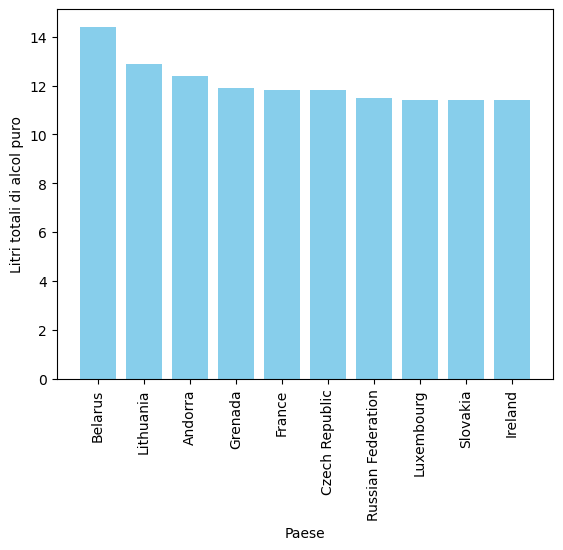

In [8]:
import matplotlib.pyplot as plt

plt.bar(top_10["country"], top_10["total_litres_of_pure_alcohol"], color='skyblue')
plt.xlabel("Paese")
plt.ylabel("Litri totali di alcol puro")
plt.xticks(rotation=90)
plt.show()

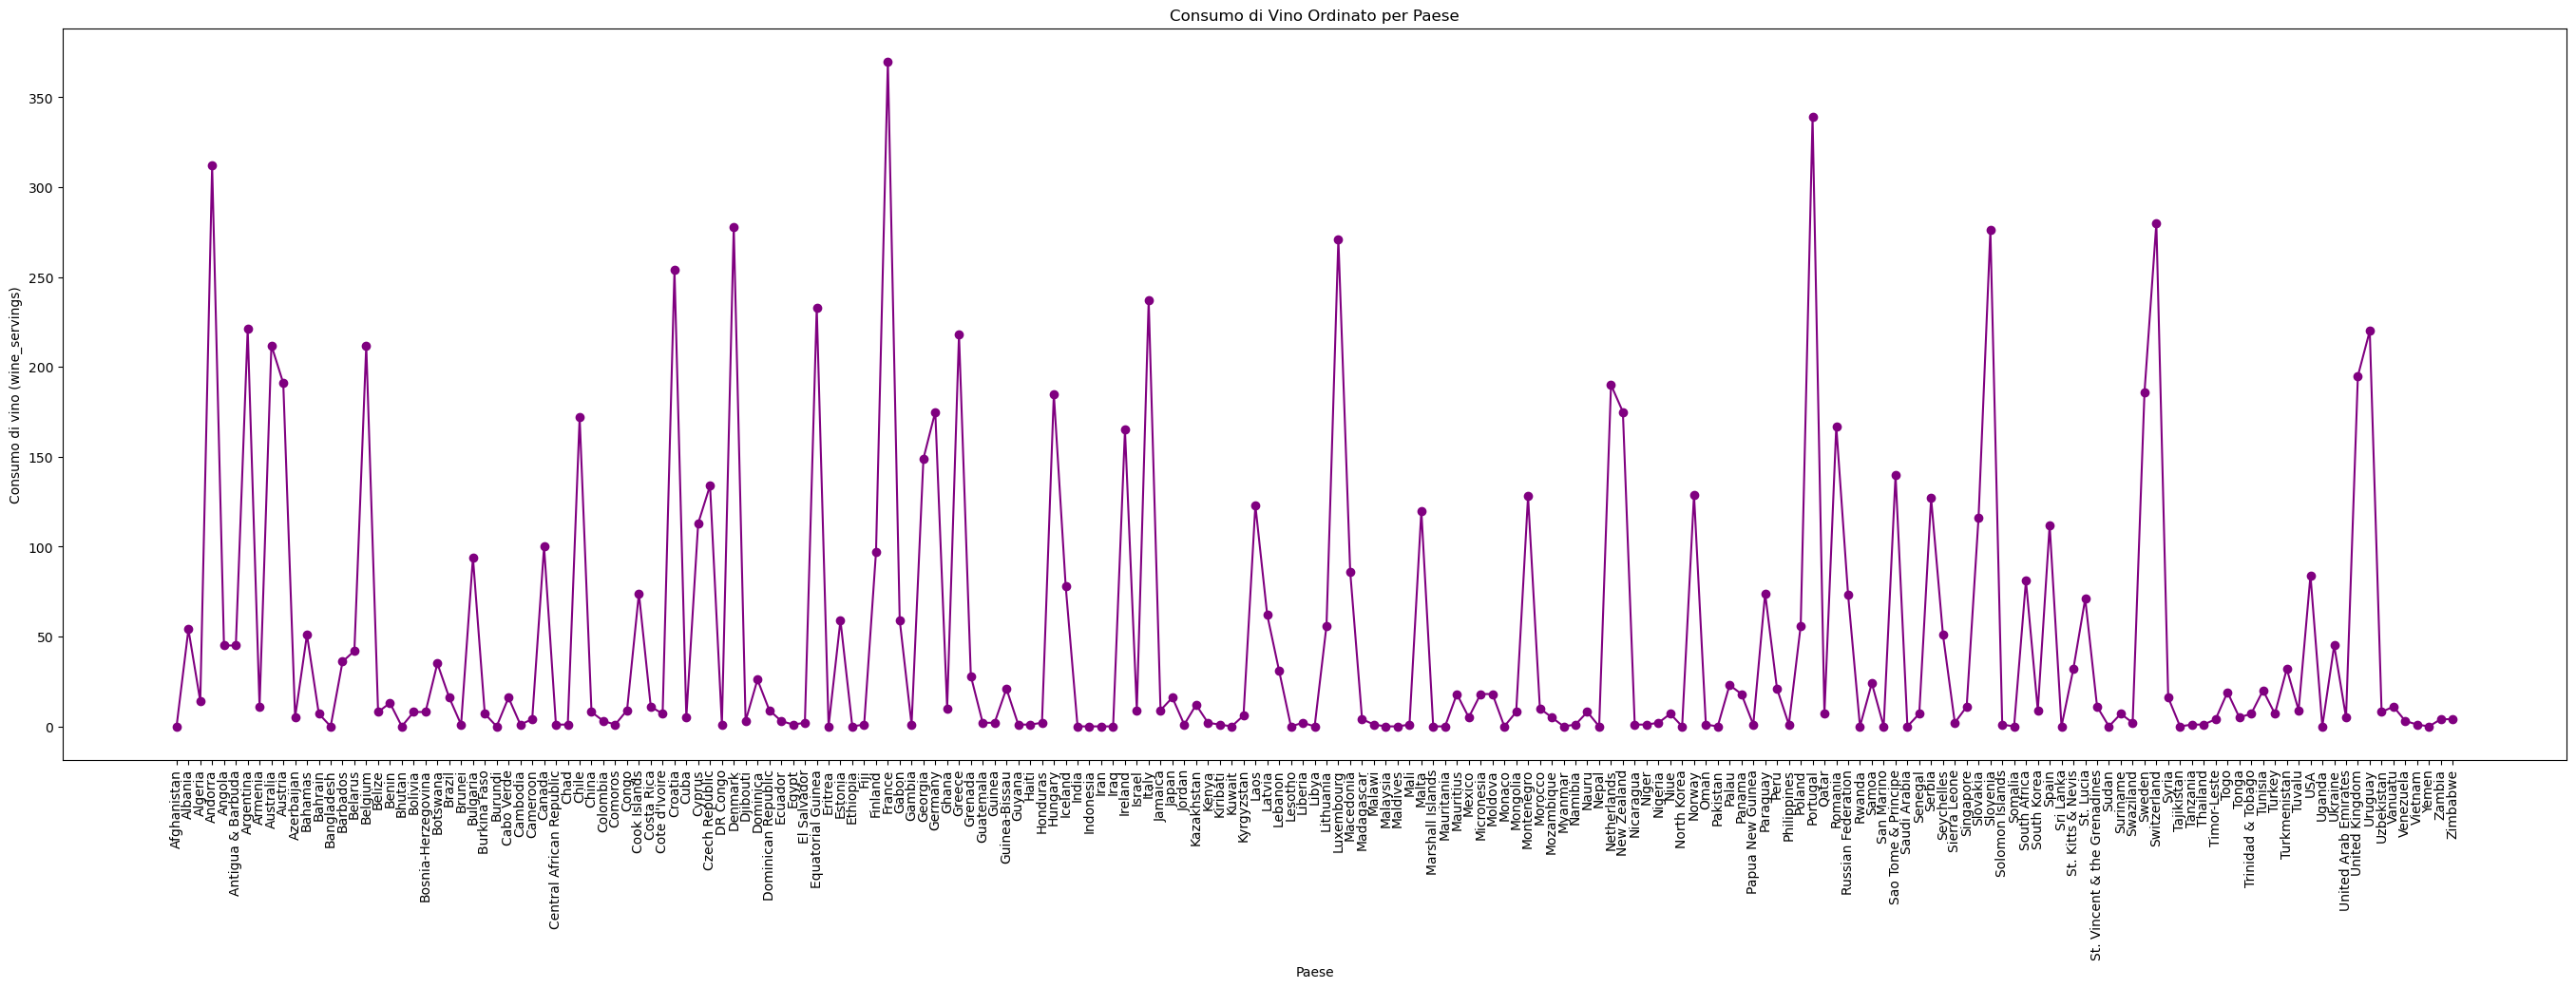

In [11]:
import matplotlib.pyplot as plt

df_sorted = df.sort_values("country")

plt.figure(figsize=(34, 10))
plt.plot(df_sorted["country"], df_sorted["wine_servings"], marker="o", linestyle="-", color="purple")
plt.xlabel("Paese")
plt.ylabel("Consumo di vino (wine_servings)")
plt.title("Consumo di Vino Ordinato per Paese")
plt.xticks(rotation=90)
plt.show()

### **2.Analisi offerte di lavoro** 

Esegui un’**analisi esplorativa** focalizzata sui **lavori nel campo dei dati in ciascun paese**.  
Analizza i seguenti aspetti per ogni paese:

* Lo **stipendio medio annuale** (`salary_year_avg`)
* Il **numero totale di offerte di lavoro** (job count)
* L’intervallo degli stipendi: **valore minimo e massimo** (`min` / `max`)

Rappresenta graficamente lo stipendio medio (`salary_year_avg`) per `job_title_short` usando un grafico a barre orizzontali. Ordina i dati dallo stipendio più alto al più basso. Includi un titolo e le etichette per gli assi x e y.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df_clean = df.dropna(subset=['salary_year_avg', 'job_country'])

# 5. Analisi aggregata per paese
country_salary_stats = df_clean.groupby('job_country').agg(
    avg_salary=('salary_year_avg', 'mean'),
    job_count=('job_id', 'count'),
    min_salary=('salary_year_avg', 'min'),
    max_salary=('salary_year_avg', 'max')
).reset_index()

# 6. Visualizzazione tabellare dei risultati per paese
print("\n📊 Analisi per Paese (ordinata per stipendio medio):\n")
print(country_salary_stats.sort_values(by='avg_salary', ascending=False))

# 7. Analisi dello stipendio medio per tipo di lavoro
job_salary_stats = df_clean.groupby('job_title_short')['salary_year_avg'].mean().sort_values(ascending=True)

# 8. Visualizzazione con Matplotlib
job_titles = job_salary_stats.index
avg_salaries = job_salary_stats.values

plt.figure(figsize=(10, 6))
plt.barh(job_titles, avg_salaries, color='skyblue', edgecolor='gray')
plt.title('Stipendio Medio Annuale per Tipo di Lavoro', fontsize=14)
plt.xlabel('Stipendio Medio ($)', fontsize=12)
plt.ylabel('Titolo del Lavoro', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

AttributeError: 'NoneType' object has no attribute 'groupby'

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Assumiamo che df sia già caricato e la colonna job_posted_date sia convertita

# Assicuriamoci che salary_year_avg sia numerico
df['salary_year_avg'] = pd.to_numeric(df['salary_year_avg'], errors='coerce')

# Rimuoviamo i valori nulli nella colonna 'salary_year_avg' e 'country'
df_clean = df.dropna(subset=['salary_year_avg', 'job_country'])

# Analisi aggregata per paese
country_salary_stats = df_clean.groupby('job_country').agg(
    avg_salary=('salary_year_avg', 'mean'),
    job_count=('job_id', 'count'),
    min_salary=('salary_year_avg', 'min'),
    max_salary=('salary_year_avg', 'max')
).reset_index()

print(country_salary_stats.sort_values(by='avg_salary', ascending=False))
job_salary_stats = df_clean.groupby('job_title_short')['salary_year_avg'].mean().sort_values(ascending=True)

plt.figure(figsize=(10, 6))
plt.title('Stipendio Medio Annuale per Tipo di Lavoro')
plt.xlabel('Stipendio Medio ($)')
plt.ylabel('Titolo del Lavoro')
plt.show()


KeyError: "Column(s) ['job_id'] do not exist"

KeyError: "Column(s) ['max', 'min'] do not exist"